In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

mw = 1
def Cn(n):
    return (1 / (2**n * math.factorial(n) * math.pi**0.5))**0.5

def Hermit(x, n):
    ksi = x
    
    if n == 0:
        return 1
    elif n == 1:
        return 2 * ksi
    elif n == 2:
        return 4 * ksi**2 - 2
    elif n == 3:
        return 8 * ksi**3 - 12 * ksi
    
def precise(x, n):
    ksi = x
    # print(ksi, Cn(n), Hermit(x, n))
    return Cn(n) * Hermit(x, n) * math.exp(-0.5 * ksi**2) 
    
eps = 1e-3
def classic(x, n):
    x1 = x / (2 * (n + 0.5))**0.5
    
    def A():
        a = (2 / math.pi)**0.5
        if math.fabs(x1) > 1:
            a /= 2
        return a
    
    def startC():
        if (math.fabs(x1) > 1):
            val = A() / (x1**2 - 1)**0.25
        else:
            val = A() / (1 - x1**2)**0.25
        if n % 2 == 1 and x1 < -1:
            val *= -1
        val /= (2 * (n + 0.5))**0.25
        return  val
    
    if math.fabs(x1) < 1 - eps:
        return startC() * math.sin(math.pi / 4 + (n + 0.5) * (math.acos(x1) - x1 * (1 - x1**2)**0.5))
    else:
        return startC() * math.exp((n + 0.5) * (-math.fabs(x1) * (x1**2 - 1)**0.5  + math.log(math.fabs(x1) + (x1**2 - 1)**0.5)))

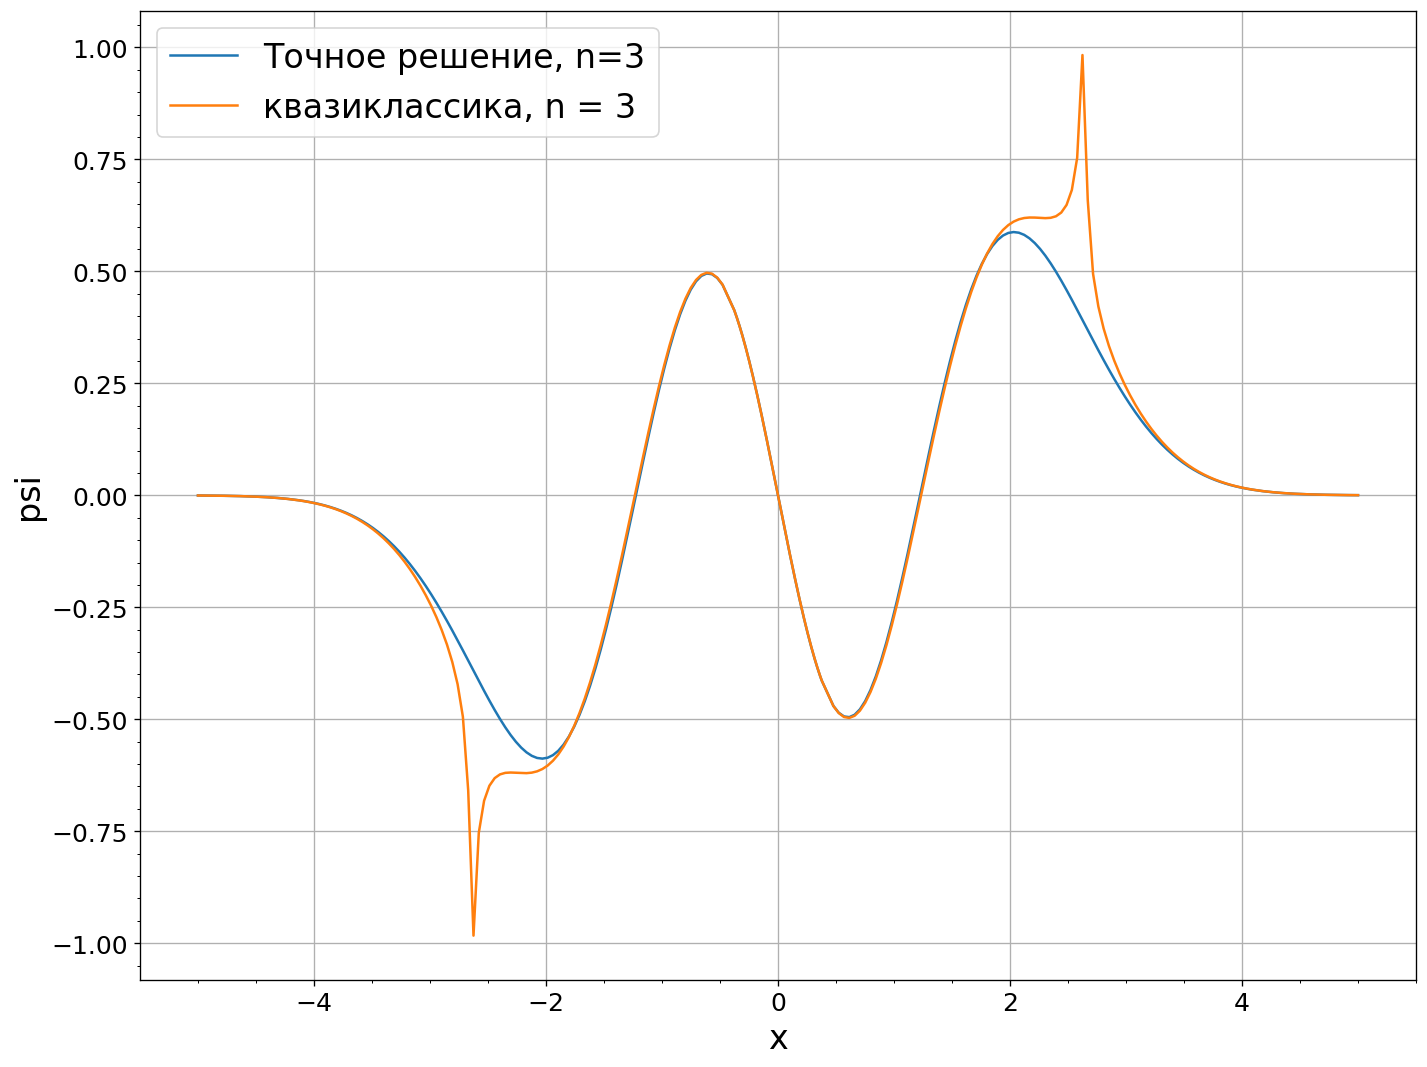

In [2]:
n = 3
x = np.linspace(-1, 1, 100)
b = 5
b2 = 1 / (2 * (n + 0.5))**0.5
m = 100
x = np.concatenate((np.linspace(-b , -b2 - 100 * eps, m), np.linspace(-b2 + eps, b2 - eps, m), np.linspace(b2 + 100 * eps, b, m)))
# print(x)

yClass = np.array([classic(xCur, n) for xCur in x])

yHerm = np.array([precise(xCur, n) for xCur in x])

%matplotlib inline
plt.figure(figsize=[12, 9], dpi=120)
plt.xlabel(r'x', fontsize=20)
plt.ylabel('psi', fontsize=20)
plt.tick_params(labelsize=15)
plt.plot(x, yHerm,label=f"Точное решение, n={n}")
plt.plot(x, yClass, label=f"квазиклассика, n = {n}")
plt.grid()
# plt.minorticks_off
plt.minorticks_on()
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.savefig("первая задача.jpeg")
plt.show()


К задаче 5

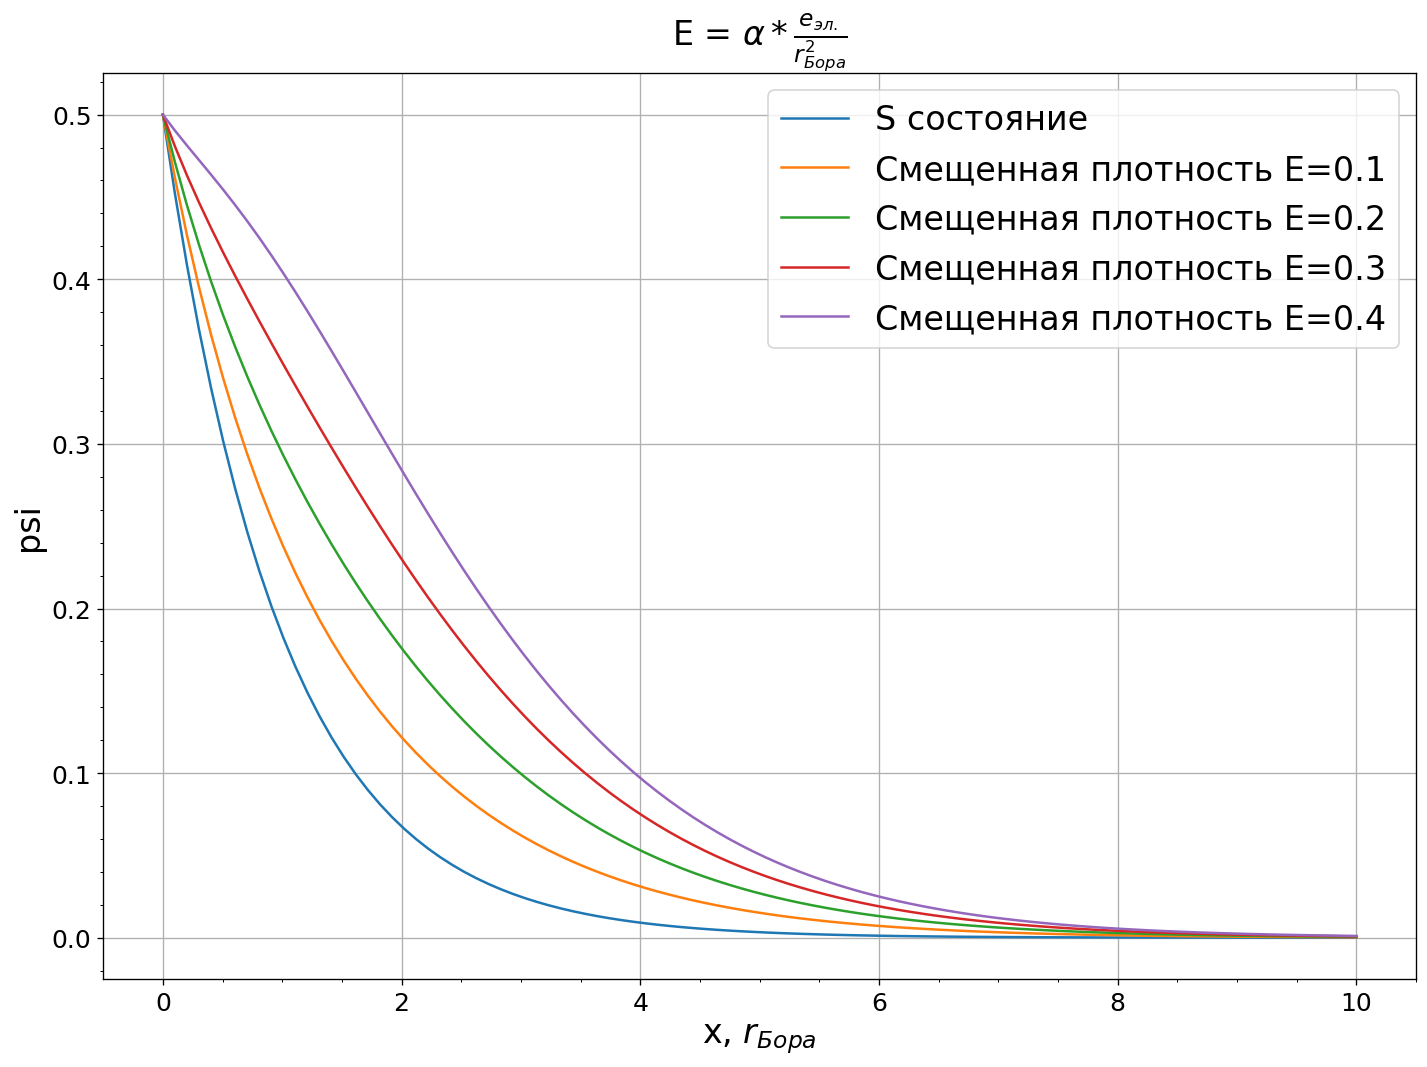

In [3]:

f = lambda r, E : math.exp(-r) / 2 * (1 + E * (r**2 + r * 2))
f0 = lambda r : math.exp(-r) / 2
r = np.linspace(0, 10, 100)
%matplotlib inline
plt.figure(figsize=[12, 9], dpi=120)
plt.xlabel(r'x, $r_{Бора}$', fontsize=20)
plt.ylabel('psi', fontsize=20)
plt.tick_params(labelsize=15)

# def integ(psi, x):
#     for i in range(len(x)):
        
plt.title(r"E = $\alpha * \frac{e_{эл.}}{r_{Бора}^2}$", fontsize=20)
plt.plot(r, [f0(rCur) for rCur in r], linestyle="-", label=f"S состояние")
for E1 in range (1, 5):
    E = E1 / 10
    plt.plot(r, [f(rCur, E) for rCur in r], label=f"Смещенная плотность E={E}")
plt.grid()
# plt.minorticks_off
plt.minorticks_on()
plt.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.savefig("пятая задача.jpeg")
plt.show()
